# A Tutorial for LEEM data base classes

This gives an introduction for loading LEEM images and image stacks and accessing the data. For simple plotting, this is not needed but may be helpful. Look at `demo_plotting.ipynb` first to learn the basics.

In [1]:
from uspy import leem

import matplotlib.pyplot as plt
import numpy as np

TESTDATA_DIR = "../testdata/"

Inside `uspy.leem`, there are two classes `LEEMImg` and `LEEMStack`. These two base classes encapsule and parse the raw data. They use lazy loading: Data is only loaded into RAM when it is first needed.
The real implementation is in `uspy.leem.base`, but that module does not need to be loaded extra.

## LEEMImg

You can load an image by giving a file name to the class constructor:

In [2]:
img = leem.LEEMImg(TESTDATA_DIR + "bremen.dat")

You can use attributes to access the images' metadata. They return np.nan when the value is not defined. You can also change the values, for example if the value is missing you can fill in the correct one.

In [3]:
print(img.energy)
img.energy = 7.5
print(img.energy)
print(img.temperature)
print(img.path)
print(img.pressure1)
print(img.pressure2)
print(img.objective)
print(img.fov)
print(img.exposure)
print(img.averaging)
print(img.width)
print(img.height)
print(img.timestamp)
print(img.rel_time)    # this is used in stacks, where it gives the time difference to the first image of the stack
print(img.time)

6.9900031089782715
7.5
153.20556640625
../testdata/bremen.dat
1.1000000021965661e-08
1.3199999981949873e-09
1725.06298828125
nan
0.10000000149011612
1
624
600
1545255439.173
1545255439.173
2018-12-19 21:37:19


Internally, a `LEEMImg` object uses its "meta" and attribute to find these metadata, but it is usually not recommended to use this because the names of the variables are different. But it can help for special fields like the Mitutoyo values. It can not be written to.

In [4]:
print(img.meta)

{'id': 'UKSOFT2001', 'size': 104, 'version': 8, 'bitsperpix': 16, 'width': 624, 'height': 600, '_noimg': 1, '_recipe_size': 0, 'isize': 288, 'iversion': 6, 'colorscale_low': 88, 'colorscale_high': 3452, 'time': 1545255439.173, 'mask_xshift': 0, 'mask_yshift': 0, 'usemask': True, 'att_markupsize': 8, 'spin': 0, 'Illum.Stigm.A': 72.90997314453125, 'Start Voltage': 7.5, 'Sample Temp.': 153.20556640625, 'Objective': 1725.06298828125, 'Gauge #2': 1.3199999981949873e-09, 'Gauge #1': 1.1000000021965661e-08, 'Camera Exposure': 0.10000000149011612, 'Average Images': 0, 'Illum.Equal.X': 0.0, 'Mitutoyo X': 0.08800000697374344, 'Mitutoyo Y': -0.04200000315904617, 'Emission Cur.': 0.3808596730232239, 'Bomb. Voltage': 99999.8984375, 'Temp. Control': 99999.8984375}


`LEEMImg` also has a `data` attribute, which is a numpy array with the shape (height, width). Simple plotting can be done like in the following code, but for more elegant plotting, see the other examples, this only shows the basic thing. `data` can also be changed, for example with the logarithmic function:

(600, 624)


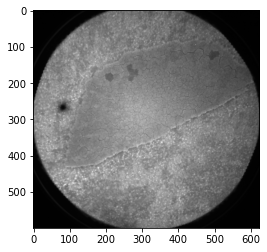

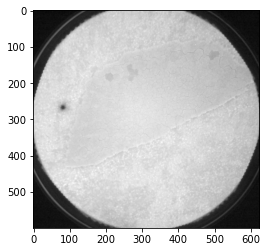

In [5]:
print(img.data.shape)
plt.imshow(img.data, cmap="gray")
plt.show()
plt.imshow(np.log(img.data), cmap="gray")

There are also some functions for prettier printing the metadata.

In [6]:
print(img.get_field_string("fov"))
print(img.get_field_string("objective"))
print(img.get_field_string("energy"))
print(img.get_unit("energy"))

nan µm
1725.1 mA
7.5 V
V


Possible attributes are:
* data              (numpy array containing the image)
* energy
* temperature
* fov               (0: LEED, nan: unknown FoV)
* pressure1
* pressure2
* width
* height
* time              (as string)
* timestamp         (as UNIX timestamp)
* exposure
* averaging         (0: sliding average)
* Objective         (lens current in mA)

Images can be saved and retrieved under the file extension ".limg":

In [7]:
img.save("/tmp/test_img.limg")
img2 = leem.LEEMImg("/tmp/test_img.limg")

print((img.data == img2.data).all())

True


## LEEMStack
A LEEMStack contains a list of LEEMImgs which it reads from a given directory. If "virtual" is set to True, it only loads images on-demand and then forgets them again, which is useful for very large stacks.

In [8]:
stack = leem.LEEMStack(TESTDATA_DIR + "test_stack_IV_g-Cu")
# stack = leem.LEEMStack(TESTDATA_DIR + "test_stack_IV_g-Cu", virtual=True)     #this produces a virtual stack
print(len(stack))

52


The stack is iterable (like a python list), so it is easy to loop through images:

In [9]:
for img in stack[:5]:
    print(img.energy)

print(stack[-8].time)

18.600000381469727
18.799999237060547
19.0
19.200000762939453
19.399999618530273
2020-07-23 13:32:42


The attributes of all images can also be accessed as an array. This is possible for every attribute that all images of the stack share. (Also for attributes that you added that are new.)

[18.60000038 18.79999924 19.         19.20000076 19.39999962 19.60000038
 19.79999924 20.         20.20000076 20.39999962 20.60000038 20.79999924
 21.         21.20000076 21.39999962 21.60000038 21.79999924 22.
 22.20000076 22.39999962 22.60000038 22.79999924 23.         23.20000076
 23.39999962 23.60000038 23.79999924 24.         24.20000076 24.39999962
 24.60000038 24.79999924 25.         25.20000076 25.39999962 25.60000038
 25.79999924 26.         26.20000076 26.39999962 26.60000038 26.79999924
 27.         27.20000076 27.39999962 27.60000038 27.79999924 28.
 28.20000076 28.39999962 28.60000038 28.79999924]
[18.600000381469727, 18.799999237060547, 19.0, 19.200000762939453, 19.399999618530273, 19.600000381469727, 19.799999237060547, 20.0, 20.200000762939453, 20.399999618530273, 20.600000381469727, 20.799999237060547, 21.0, 21.200000762939453, 21.399999618530273, 21.600000381469727, 21.799999237060547, 22.0, 22.200000762939453, 22.399999618530273, 22.600000381469727, 22.79999923706054

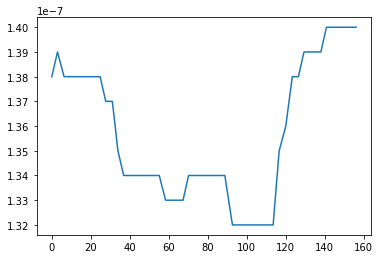

In [10]:
print(stack.energy)       # numpy array
print([img.energy for img in stack])   # list comprehension, this is the same as the last line

plt.plot(stack.rel_time, stack.pressure1)

Stacks can be saved and loaded like images:

In [11]:
stack.save("/tmp/test_stack.lstk")
stack2 = leem.LEEMStack("/tmp/test_stack.lstk")

print((stack.energy == stack2.energy).all())

True
